## Initialize session

In [2]:
%matplotlib notebook
from nugridpy import nugridse as mp
from nugridpy import mesa as ms
import numpy as np
import matplotlib.pyplot as plt

data_dir="/data/nugrid_apod2"    

ms.set_nugrid_path(data_dir)
mp.set_nugrid_path(data_dir)

## Stefan-Boltzmann Law

The Stefan-Boltzmann law describes the flux emitted from the surface of a blackbody at a temperature T. This can be used in conjunction with the surface area of the object to determine the luminosity

<IPython.core.display.Javascript object>


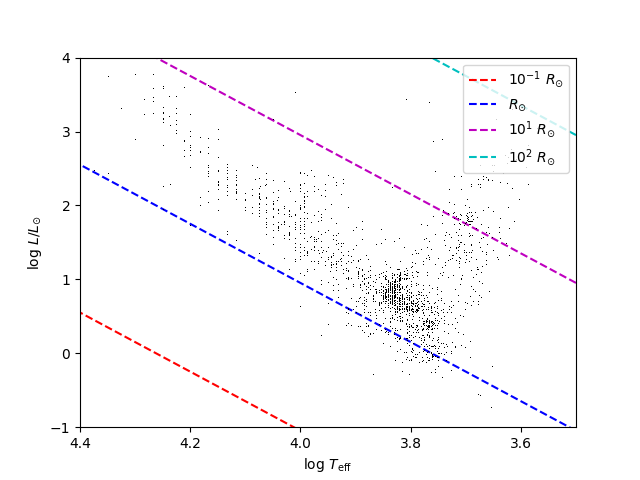

In [32]:
# import the text file with data
data = np.genfromtxt('main sequence.txt',unpack=True)

# log_teff = column 1, log_L = column 2
log_teff = data[0]
log_L = data[1]

# get lines of constant radii starting from 10-2 solar radii
Rsun = 6.95e8
Lsun = 3.846e26
sigma = 5.67e-8

radii_list = [1e-1,1.,1e1,1e2]

# define function for L(T,R)
def L(T,R):
    
    # temperature will be log, convert to regular T
    return 4 * np.pi * (Rsun * R)**2 * sigma * (10**(T))**4

# use temperature ranges to get a bunch of luminosities for different radii
temperature = np.linspace(3.5,4.4,1000)

# define luminosity array
lum = np.zeros((len(radii_list),len(temperature)))

for i in range(len(radii_list)):
    for p in range(len(temperature)):
        lum[i][p] = np.log10(L(temperature[p],radii_list[i]) / Lsun)

# create HR diagram
plt.figure(1)

# labels for radii
radii_label = [r"$10^{-1} \ R_\mathrm{\odot}$",
               r"$R_\mathrm{\odot}$",r"$10^{1} \ R_\mathrm{\odot}$",r"$10^{2} \ R_\mathrm{\odot}$"]

radii_colour = ['r--','b--','m--','c--']

# plot lines of constant radii
for i in range(len(radii_list)):
    plt.plot(temperature,lum[i],radii_colour[i],label=radii_label[i])
    
# plot main sequence
plt.plot(log_teff,log_L,'k,')

# create x and y limits
plt.ylim([-1,4])
plt.xlim([3.5,4.4])

# invert x axis
plt.gca().invert_xaxis()

# legend
plt.legend(loc='upper right')

# xlabel and ylabel
plt.xlabel(r"log $T_\mathrm{eff}$")
plt.ylabel(r"log $ L / L_\mathrm{\odot}$")
